<a href="https://colab.research.google.com/github/matheusfigueiredoo/detection-of-cyber-attacks/blob/main/%5B1%5D_mqttset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.12.0 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

from sklearn.neural_network import MLPClassifier
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train70_augmented.csv", nrows=2500000)
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test30_augmented.csv", nrows=2500000)

# traffic by data
print("Train data:", train['target'].value_counts(), "\n")
print("Test data:", test['target'].value_counts(), "\n")

Train data: target
legitimate    1250277
malformed      250376
slowite        250357
bruteforce     250238
flood          249683
dos            249069
Name: count, dtype: int64 

Test data: target
legitimate    1249148
dos            250695
slowite        250434
flood          250333
malformed      250093
bruteforce     249297
Name: count, dtype: int64 



# Pre processing data

In [ ]:
# columns_0 are the features with all the values equal to zero
# these features will be dropped because their values does not interfere in the training
columns_0 = ['mqtt.conack.flags.reserved', 'mqtt.conack.flags.sp', 'mqtt.conflag.qos',
           'mqtt.conflag.reserved', 'mqtt.conflag.retain', 'mqtt.conflag.willflag',
           'mqtt.retain', 'mqtt.sub.qos', 'mqtt.suback.qos', 'mqtt.willmsg', 'mqtt.willmsg_len',
           'mqtt.willtopic', 'mqtt.willtopic_len']
train = train.drop(columns_0, axis=1)
test = test.drop(columns_0, axis=1)

# new data shape
print(train.shape)
print(test.shape)

(2500000, 21)
(2500000, 21)


In [ ]:
# data balancing

# train
x = []
for i in train.index:
  if train['target'][i] == 'legitimate':
    x.append(i)
x = x[:1000277]
train = train.drop(x)

# test
x = []
for i in test.index:
  if test['target'][i] == 'legitimate':
    x.append(i)
x = x[:999148]
test = test.drop(x)

# new data target values
print("Train data:", train['target'].value_counts(), "\n")
print("Test data:", test['target'].value_counts(), "\n")

Train data: target
malformed     250376
slowite       250357
bruteforce    250238
legitimate    250000
flood         249683
dos           249069
Name: count, dtype: int64 

Test data: target
dos           250695
slowite       250434
flood         250333
malformed     250093
legitimate    250000
bruteforce    249297
Name: count, dtype: int64 



In [ ]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

# adjustment of categorical variables
# features and targets
train['tcp.flags'] = label.fit_transform(train['tcp.flags'])
train['mqtt.conack.flags'] = label.fit_transform(train['mqtt.conack.flags'])
train['mqtt.hdrflags'] = label.fit_transform(train['mqtt.hdrflags'])
train['mqtt.protoname'] = label.fit_transform(train['mqtt.protoname'])
train['mqtt.msg'] = label.fit_transform(train['mqtt.msg'])
train['mqtt.conflags'] = label.fit_transform(train['mqtt.conflags'])
train['target'] = label.fit_transform(train['target'])

test['tcp.flags'] = label.fit_transform(test['tcp.flags'])
test['mqtt.conack.flags'] = label.fit_transform(test['mqtt.conack.flags'])
test['mqtt.hdrflags'] = label.fit_transform(test['mqtt.hdrflags'])
test['mqtt.protoname'] = label.fit_transform(test['mqtt.protoname'])
test['mqtt.msg'] = label.fit_transform(test['mqtt.msg'])
test['mqtt.conflags'] = label.fit_transform(test['mqtt.conflags'])
test['target'] = label.fit_transform(test['target'])

In [ ]:
# separation between features and targets

X_train = train.iloc[:,:-1]
y_train = train['target']
X_test = test.iloc[:,:-1]
y_test = test['target']

In [ ]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

# Sequential neural network

Epoch 1/200
1500/1500 - 30s - loss: 0.8498 - accuracy: 0.6452 - val_loss: 0.5739 - val_accuracy: 0.7369 - 30s/epoch - 20ms/step
Epoch 2/200
1500/1500 - 22s - loss: 0.5695 - accuracy: 0.7345 - val_loss: 0.5647 - val_accuracy: 0.7380 - 22s/epoch - 15ms/step
Epoch 3/200
1500/1500 - 20s - loss: 0.5639 - accuracy: 0.7346 - val_loss: 0.5674 - val_accuracy: 0.7159 - 20s/epoch - 14ms/step
Epoch 4/200
1500/1500 - 23s - loss: 0.6471 - accuracy: 0.7258 - val_loss: 0.5630 - val_accuracy: 0.7391 - 23s/epoch - 15ms/step
Epoch 5/200
1500/1500 - 21s - loss: 0.6421 - accuracy: 0.7305 - val_loss: 0.5636 - val_accuracy: 0.7340 - 21s/epoch - 14ms/step
Epoch 6/200
1500/1500 - 22s - loss: 0.5609 - accuracy: 0.7384 - val_loss: 0.5575 - val_accuracy: 0.7403 - 22s/epoch - 15ms/step
Epoch 7/200
1500/1500 - 25s - loss: 0.5582 - accuracy: 0.7387 - val_loss: 0.5579 - val_accuracy: 0.7381 - 25s/epoch - 17ms/step
Epoch 8/200
1500/1500 - 21s - loss: 0.5571 - accuracy: 0.7391 - val_loss: 0.5554 - val_accuracy: 0.7387 

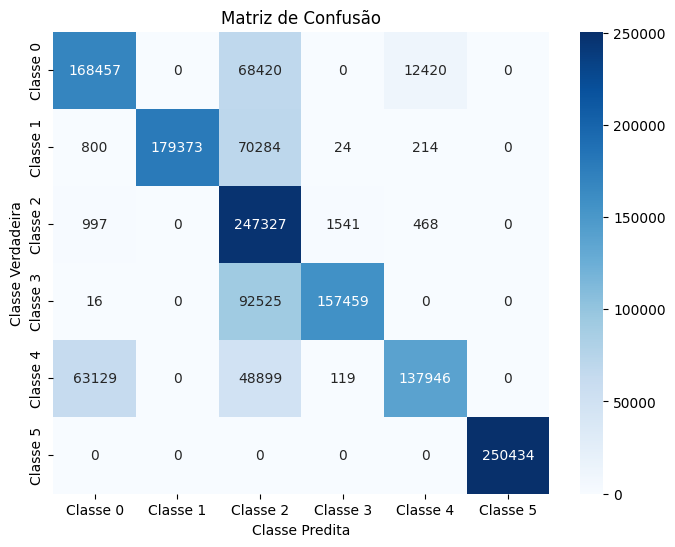

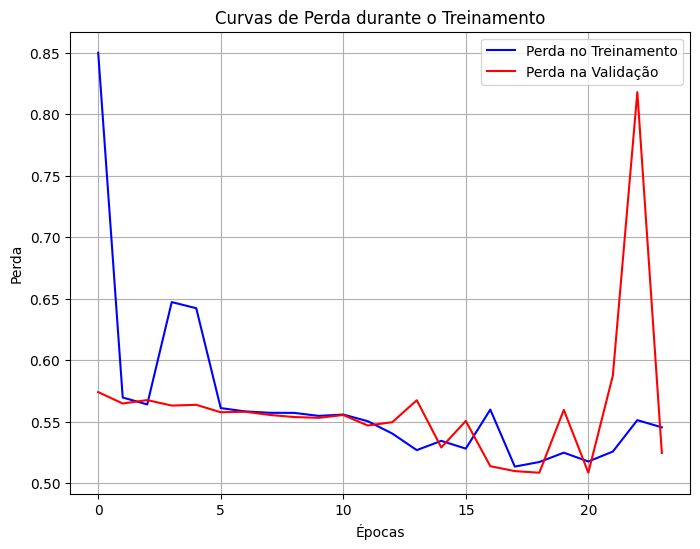

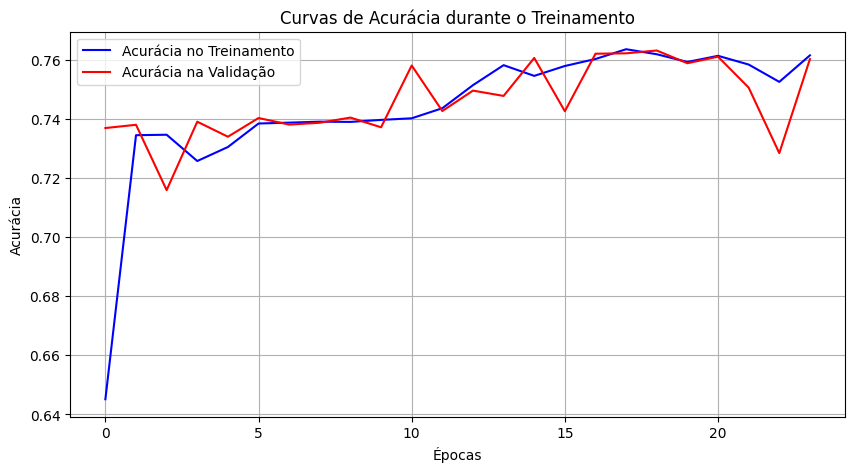

In [ ]:
model = Sequential()
model.add(Dense(100, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(90, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(80, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(70, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(60, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(50, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(30, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(20, kernel_initializer='normal'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),callbacks=[monitor],verbose=2,epochs=200,batch_size=1000)


# lost and accuracy values while training
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# accuraty test
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
accuracy = accuracy_score(y_test, y_pred)
print("\n")
print("Accuracy test:", accuracy, "\n")

print("Tabela de desempenho:")
print(classification_report(y_test, y_pred))
print("\n")

# confusion matrix
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix, "\n")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Classe ' + str(i) for i in range(conf_matrix.shape[0])],
            yticklabels=['Classe ' + str(i) for i in range(conf_matrix.shape[0])])
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão')
plt.show()
print("\n")

# curves lost
plt.figure(figsize=(8, 6))
plt.plot(train_loss, label='Perda no Treinamento', color='blue')
plt.plot(val_loss, label='Perda na Validação', color='red')
plt.title('Curvas de Perda durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.grid(True)
plt.show()
print("\n")

# accuracy lost
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Acurácia no Treinamento', color='blue')
plt.plot(val_accuracy, label='Acurácia na Validação', color='red')
plt.title('Curvas de Acurácia durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()

# Multi-Layer Perceptron

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=200, activation='relu', solver='adam',
                    alpha=0.000001, batch_size=1000, max_iter=200, shuffle=True,
                    random_state=42)
mlp.fit(X_train, y_train)
print("Accuracy train: ", mlp.score(X_train, y_train))
# cross validation
scores = cross_val_score(mlp, X_train, y_train, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()),"\n")

print("Accuracy test: ", mlp.score(X_test, y_test), "\n")

# predição de valores
predict_mlp = mlp.predict(X_test)
print("Tabela de desempenho: ")
print(classification_report(y_test, predict_mlp), "\n")

# confusion matrix
matrix_mlp = confusion_matrix(y_test, predict_mlp)
print("Matriz de confusão:")
print(matrix_mlp, "\n")
cm_mlp = confusion_matrix(y_test, predict_mlp, labels=mlp.classes_)
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=mlp.classes_)
disp_mlp.plot()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy train:  0.8021261259579269


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


KeyboardInterrupt: 